# Regresi Model

https://www.tensorflow.org/tutorials/keras/regression

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset = dataset.dropna()

In [6]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

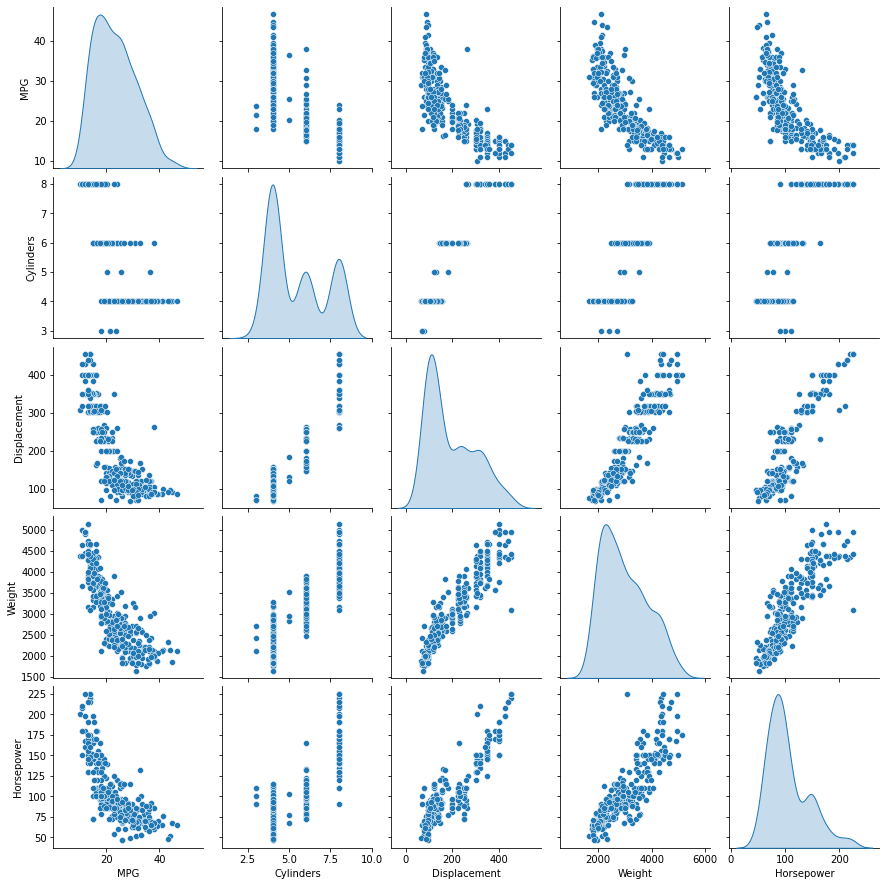

In [10]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight','Horsepower' ]], diag_kind='kde')

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [13]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [14]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [15]:
horsepower_model.predict(horsepower[:10])

array([[-0.464],
       [-0.262],
       [ 0.856],
       [-0.65 ],
       [-0.588],
       [-0.231],
       [-0.697],
       [-0.588],
       [-0.153],
       [-0.262]], dtype=float32)

In [16]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [17]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 22.8649 - val_loss: 22.9371
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 22.0679 - val_loss: 22.1367
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 21.2623 - val_loss: 21.3370
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 20.4631 - val_loss: 20.5371
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 19.6615 - val_loss: 19.7370
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 18.8614 - val_loss: 18.9371
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 18.0613 - val_loss: 18.1371
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 17.2613 - val_loss: 17.3371
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 16.4623 - val_loss: 16.5372
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 15.6670 - val_loss: 15.7374
Epoch 11

8/8 [==============================] - 0s 3ms/step - loss: 3.8036 - val_loss: 4.1888
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8021 - val_loss: 4.1979
Epoch 86/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8044 - val_loss: 4.1919
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8031 - val_loss: 4.1973
Epoch 88/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8067 - val_loss: 4.1966
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8044 - val_loss: 4.1984
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8027 - val_loss: 4.1893
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8020 - val_loss: 4.1961
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8045 - val_loss: 4.1945
Epoch 93/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8059 - val_loss: 4.1584
Epoch 94/100
8/8 [===============

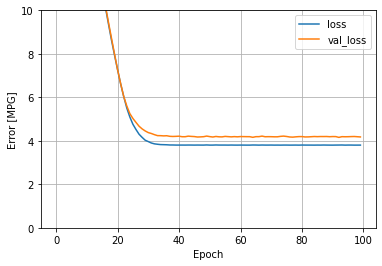

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [19]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

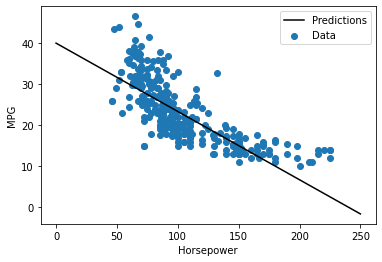

In [20]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
plot_horsepower(x,y)

### DNN - Regresion 

In [21]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [22]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [23]:
dnn_horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [24]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 16ms/step - loss: 23.1130 - val_loss: 23.4677
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.8320 - val_loss: 23.1619
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 22.5368 - val_loss: 22.8176
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 22.1806 - val_loss: 22.3915
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 21.7326 - val_loss: 21.8542
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 21.1662 - val_loss: 21.1694
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 20.4300 - val_loss: 20.2998
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 19.5214 - val_loss: 19.2253
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 18.4209 - val_loss: 18.0124
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 17.2878 - val_loss: 16.7618
Epoch 11

8/8 [==============================] - 0s 3ms/step - loss: 3.2919 - val_loss: 3.7775
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2631 - val_loss: 3.8005
Epoch 86/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2779 - val_loss: 3.7940
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2726 - val_loss: 3.7583
Epoch 88/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2669 - val_loss: 3.7789
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2610 - val_loss: 3.7790
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2637 - val_loss: 3.7747
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2597 - val_loss: 3.7818
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2783 - val_loss: 3.7630
Epoch 93/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2620 - val_loss: 3.7766
Epoch 94/100
8/8 [===============

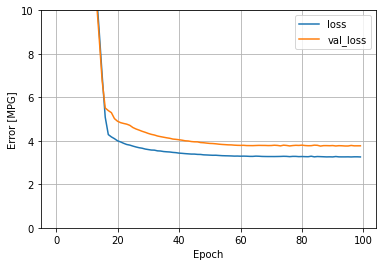

In [25]:
plot_loss(history)

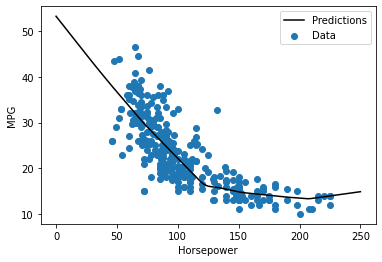

In [26]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)